## JBP 42 Rules for Life NLP Analysis

#### By: Greg Loughnane, Dr. Jordan B. Peterson Fellow, Acton School of Business, 2020
##### Created in February, 2020, and posted to GitHub in December, 2020

### 0) Imports & Definitions
    0.1 Packages, Libraries, and Utils
    0.2 Global Variable Definitions
### 1) Import Rules For Life and Create Corpus
    1.1 Create DataFrame and meta.tsv Projector Visualization File
    1.2 Create Corpus of Text from Filtered Rules For Life
### 2) Create Word Embedding Vectors from Corpus
    2.1 Define Custom Vocabulary of Most Important Words
    2.2 Analyze Vocabulary for the Most Frequent Words
    2.3 Create Vector Embeddings File for Projector Visualization 

## 0) Imports & Definitions

#### 0.1 Packages, Libraries, and Utils

In [1]:
# Data Read/Write/Manipulation packages
import pandas as pd
import numpy as  np

# Visualizations and Dimensional Reduction
import seaborn as sns
import matplotlib.pyplot as plt

# Machine learning modeling and stats
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Utils
from utils_final import normalize_corpus

#### 0.2 Global Variable Definitions

In [2]:
# Outlier thresholds (in # of design hours)
rules = ["Tell the truth, or at least don't lie.", 
         'Do not do things that you hate.', 
         'Act so that you can tell the truth about how you act.',
         'Pursue what is meaningful, not what is expedient.',
         'If you have to choose, be the one who does things, instead of the one who is seen to do things.',
         'Pay attention.',
         'Assume that the person you are listening to might know something you need to know. Listen to them hard enough so that they will share it with you.',
         'Plan and work diligently to maintain the romance in your relationships.',
         'Be careful who you share good news with.',
         'Be careful who you share bad news with.',
         'Make at least one thing better every single place you go.',
         'Imagine who you could be, and then aim single-mindedly at that.',
         'Do not allow yourself to become arrogant or resentful.',
         'Try to make one room in your house as beautiful as possible.',
         'Compare yourself to who you were yesterday, not to who someone else is today.',
         'Work as hard as you possibly can on at least one thing and see what happens.',
         'If old memories still make you cry, write them down carefully and completely.',
         'Maintain your connections with people.',
         'Do not carelessly denigrate social institutions or artistic achievement.',
         'Treat yourself as if you were someone that you are responsible for helping.',
         'Ask someone to do you a small favour, so that he or she can ask you to do one in the future.',
         'Make friends with people who want the best for you.',
         'Do not try to rescue someone who does not want to be rescued, and be very careful about rescuing someone who does.',
         'Nothing well done is insignificant.',
         'Set your house in perfect order before you criticize the world.'
         'Dress like the person you want to be.',
         'Be precise in your speech.',
         'Stand up straight with your shoulders back.',
         "Don't avoid something frightening if it stands in your way -- and don't do unnecessarily dangerous things.",
         'Do not let your children do anything that makes you dislike them.',
         'Do not transform your wife into a maid.',
         'Do not hide unwanted things in the fog.',
         'Notice that opportunity lurks where responsibility has been abdicated.',
         'Read something written by someone great.',
         'Pet a cat when you encounter one on the street.',
         'Do not bother children when they are skateboarding.',
         "Don't let bullies get away with it.",
         'Write a letter to the government if you see something that needs fixing -- and propose a solution.',
         'Remember that what you do not yet know is more important than what you already know.',
         'Be grateful in spite of your suffering.']

print(rules)

["Tell the truth, or at least don't lie.", 'Do not do things that you hate.', 'Act so that you can tell the truth about how you act.', 'Pursue what is meaningful, not what is expedient.', 'If you have to choose, be the one who does things, instead of the one who is seen to do things.', 'Pay attention.', 'Assume that the person you are listening to might know something you need to know. Listen to them hard enough so that they will share it with you.', 'Plan and work diligently to maintain the romance in your relationships.', 'Be careful who you share good news with.', 'Be careful who you share bad news with.', 'Make at least one thing better every single place you go.', 'Imagine who you could be, and then aim single-mindedly at that.', 'Do not allow yourself to become arrogant or resentful.', 'Try to make one room in your house as beautiful as possible.', 'Compare yourself to who you were yesterday, not to who someone else is today.', 'Work as hard as you possibly can on at least one th

## 1) Import Rules For Life and Create Corpus

#### 1.1 Create DataFrame and meta.tsv Projector Visualization File

In [3]:
df = pd.DataFrame(rules)

# Check how many total quote request entries we have
print(df.shape[0])

df = df.rename(columns={0: "Rules"})
df.to_csv('meta.tsv', index=None, header=False)

39


#### 1.2 Create Corpus of Text from Filtered Rules For Life

In [4]:
corpus = [] # Create an empty list call corpus

for index, r in df.iterrows():
    rules     = r['Rules'] 
    textforfile = str(rules)
    norm_data = normalize_corpus(textforfile, 
                                 html_stripping=True, 
                                 contraction_expansion=True,
                                 accented_char_removal=True, 
                                 text_lower_case=True,
                                 text_lemmatization=True, 
                                 special_char_removal=True,
                                 stopword_removal=True, 
                                 number_removal=True, 
                                 weird_chars=True)

    corpus.append(norm_data) 

corpus = pd.DataFrame(corpus)

## 2) Create Word Embeddings from Corpus

#### 2.1 Define Custom Vocabulary of Most Important Words

In [5]:
#%% Tokenize words using CountVectorizer
X = corpus.iloc[:,0]

# Initialize Vectorizer
vectorizer = CountVectorizer()

# Fit Vectorizer to corpus
model = vectorizer.fit(X)                                           

# Transform corpus
bag_of_words = vectorizer.transform(X)   

# Print Vocabulary
vocab = vectorizer.vocabulary_
print(vocab)

{'tell': 128, 'truth': 133, 'least': 66, 'not': 82, 'lie': 69, 'thing': 129, 'hate': 56, 'act': 2, 'pursue': 100, 'meaningful': 77, 'expedient': 41, 'choose': 25, 'one': 86, 'instead': 63, 'see': 110, 'pay': 89, 'attention': 11, 'assume': 10, 'person': 92, 'listen': 71, 'may': 76, 'know': 65, 'something': 120, 'need': 80, 'hard': 55, 'enough': 39, 'share': 112, 'plan': 95, 'work': 141, 'diligently': 34, 'maintain': 74, 'romance': 108, 'relationship': 102, 'careful': 20, 'good': 50, 'news': 81, 'bad': 15, 'make': 75, 'well': 139, 'every': 40, 'single': 114, 'place': 94, 'go': 49, 'imagine': 60, 'could': 29, 'aim': 3, 'mindedly': 79, 'allow': 4, 'become': 17, 'arrogant': 7, 'resentful': 105, 'try': 134, 'room': 109, 'house': 59, 'beautiful': 16, 'possible': 96, 'compare': 26, 'yesterday': 144, 'someone': 119, 'else': 37, 'today': 130, 'possibly': 97, 'happen': 54, 'old': 85, 'memory': 78, 'still': 124, 'cry': 31, 'write': 143, 'carefully': 21, 'completely': 27, 'connection': 28, 'people'

#### 2.2 Analyze Vocabulary for the Most Frequent Words

In [6]:
sum_words = bag_of_words.sum(axis=0)
words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
top_words = words_freq[:33]
for word, freq in top_words:
    print(word, freq)#### 2.1 Define Custom Vocabulary of Most Important Words

not 16
thing 7
one 7
someone 6
make 5
know 4
something 4
least 3
see 3
share 3
careful 3
write 3
want 3
rescue 3
tell 2
truth 2
act 2
person 2
listen 2
need 2
hard 2
work 2
maintain 2
good 2
news 2
well 2
single 2
try 2
house 2
people 2
ask 2
stand 2
let 2


[Text(0, 0, 'not'),
 Text(1, 0, 'thing'),
 Text(2, 0, 'one'),
 Text(3, 0, 'someone'),
 Text(4, 0, 'make'),
 Text(5, 0, 'know'),
 Text(6, 0, 'something'),
 Text(7, 0, 'least'),
 Text(8, 0, 'see'),
 Text(9, 0, 'share'),
 Text(10, 0, 'careful'),
 Text(11, 0, 'write'),
 Text(12, 0, 'want'),
 Text(13, 0, 'rescue'),
 Text(14, 0, 'tell'),
 Text(15, 0, 'truth'),
 Text(16, 0, 'act'),
 Text(17, 0, 'person'),
 Text(18, 0, 'listen'),
 Text(19, 0, 'need'),
 Text(20, 0, 'hard'),
 Text(21, 0, 'work'),
 Text(22, 0, 'maintain'),
 Text(23, 0, 'good'),
 Text(24, 0, 'news'),
 Text(25, 0, 'well'),
 Text(26, 0, 'single'),
 Text(27, 0, 'try'),
 Text(28, 0, 'house'),
 Text(29, 0, 'people'),
 Text(30, 0, 'ask'),
 Text(31, 0, 'stand'),
 Text(32, 0, 'let')]

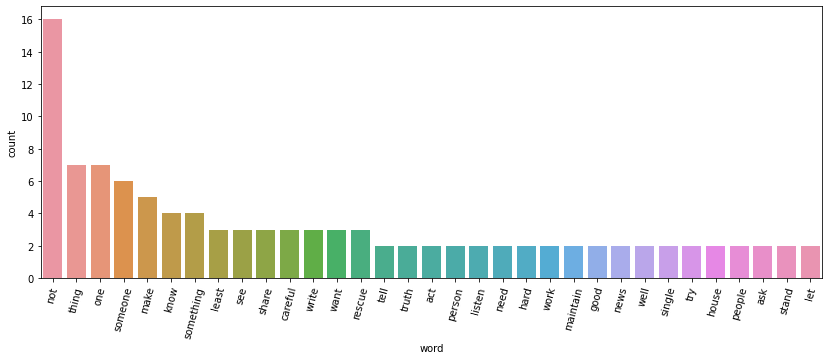

In [7]:
plt.figure(figsize = (14, 5))
top_words = pd.DataFrame(top_words)
top_words.columns = ['word', 'count']
top_words_plot = sns.barplot(top_words['word'], top_words['count'])
top_words_plot.set_xticklabels(top_words_plot.get_xticklabels(), rotation=75)

#### 2.3 Create Vector Embeddings File for Projector Visualization 

In [8]:
# Create vecs.tsv --> This represents the word embeddings, where each row is a quote.
vector_embeddings = bag_of_words.toarray() # numpy array
df_v = pd.DataFrame(vector_embeddings)

# Write out file
df_v.to_csv(r'vecs.tsv', index=None, header=False, sep="\t",)